Tamanho da imagem com 1200dpi:  (3692, 2812)
Tamanho da imagem com 0300dpi:  (923, 703)
Tamanho da imagem com 0150dpi:  (462, 352)
Tamanho da imagem com 0075dpi:  (231, 176)


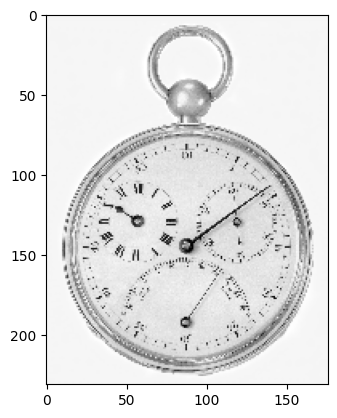

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#https://github.com/btravencolo/gsi058-labs-2022-02/blob/main/Lab01%20-%20Sampling%20and%20Quantization/lab01.ipynb
#https://github.com/GuilhermeBartasson/Processamento_Digital_De_Imagens

img1 = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)
linhas = img1.shape[0]
colunas = img1.shape[1]

print('Tamanho da imagem com 1200dpi: ',img1.shape)

img2 = img1[0:linhas:4, 0:colunas:4]
print('Tamanho da imagem com 0300dpi: ',img2.shape)

img3 = img1[0:linhas:8, 0:colunas:8]
print('Tamanho da imagem com 0150dpi: ',img3.shape)

img4 = img1[0:linhas:16, 0:colunas:16]
print('Tamanho da imagem com 0075dpi: ',img4.shape)
#Para alcançar os 72dpi, teoricamente deveriam ser saltados 16.666667 pixels, pois 1200 / 72 = 16.666667.
#Logo, seria necessário um arredondamento para 16 ou 17 pixels saltados.
#Mas saltando 17, a resolução fica maior do que nos 72dpi, significando que há mais do que 72dpi na imagem.
#Porém saltando 18, fica menor, significando que há menos do que 72dpi.

plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
#Troque o primeiro argumento por uma das variáveis "img" para ve-la com o respectivo dpi atrelado á essa variável.
#Por padrão, deixei "img4" para mostra-la com 75dpi.

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


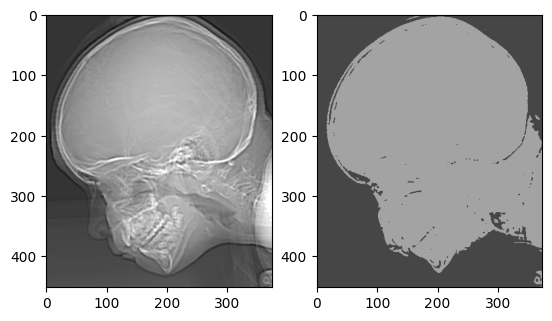

In [10]:
from sklearn.cluster import MiniBatchKMeans
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ctskull-256.tif")
(linhas, colunas) = img.shape[:2]

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.reshape((img.shape[0] * img.shape[1], 1))

clt = MiniBatchKMeans(n_clusters = 2) 
#Quanto menor o número de clusters, menor a quantidade de cores. Priorize os valores múltiplos de 4.
labels = clt.fit_predict(img)
quant = clt.cluster_centers_.astype("uint8")[labels]

quant = quant.reshape((linhas, colunas, 1))
img = img.reshape((linhas, colunas, 1))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(quant, cmap='gray', vmin=0, vmax=255)
